In [149]:
%pip install librosa

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [150]:
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [151]:
import os
import zipfile
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

# ================================
# 1️⃣ Unzip your data
# ================================
song_zip_path = r"C:\Users\abhis\Downloads\Audio_Song_Actors_01-24.zip"
speech_zip_path = r"C:\Users\abhis\Downloads\Audio_Speech_Actors_01-24.zip"
extract_dir = r"C:\Users\abhis\Downloads\Audio_Data"

def unzip_file(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Unzip song and speech folders
unzip_file(song_zip_path, os.path.join(extract_dir, "song"))
unzip_file(speech_zip_path, os.path.join(extract_dir, "speech"))

# ================================
# 2️⃣ Build DataFrame
# ================================
def get_file_list(directory, label):
    file_list = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".wav"):
                file_list.append({
                    'filepath': os.path.join(root, file),
                    'label': label
                })
    return file_list

song_files = get_file_list(os.path.join(extract_dir, "song"), "song")
speech_files = get_file_list(os.path.join(extract_dir, "speech"), "speech")

df = pd.DataFrame(song_files + speech_files)
print(f"✅ Total files found: {len(df)}")
print(df.head())


✅ Total files found: 2452
                                            filepath label
0  C:\Users\abhis\Downloads\Audio_Data\song\Actor...  song
1  C:\Users\abhis\Downloads\Audio_Data\song\Actor...  song
2  C:\Users\abhis\Downloads\Audio_Data\song\Actor...  song
3  C:\Users\abhis\Downloads\Audio_Data\song\Actor...  song
4  C:\Users\abhis\Downloads\Audio_Data\song\Actor...  song


In [152]:
# ================================
# 3️⃣ Feature extraction
# ================================
def extract_features(file_path, max_pad_len=174):
    try:
        audio, sr = librosa.load(file_path, duration=4, offset=0.5)
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
        
        pad_width = max(0, max_pad_len - mfccs.shape[1])
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        
        mfccs_scaled = np.mean(mfccs.T, axis=0)
        
        return mfccs_scaled
    except Exception as e:
        print(f"❌ Error processing {file_path}: {e}")
        return None

# Load features for all files
features = []
labels = []
file_paths = []

for i, row in df.iterrows():
    file_path = row['filepath']
    label = row['label']
    
    mfccs = extract_features(file_path)
    if mfccs is not None:
        features.append(mfccs)
        labels.append(label)
        file_paths.append(file_path)
    else:
        print(f"⚠️ Skipped: {file_path}")

X = np.array(features)
y = np.array(labels)

print(f"✅ Feature extraction complete. Total samples: {len(X)}")

✅ Feature extraction complete. Total samples: 2452


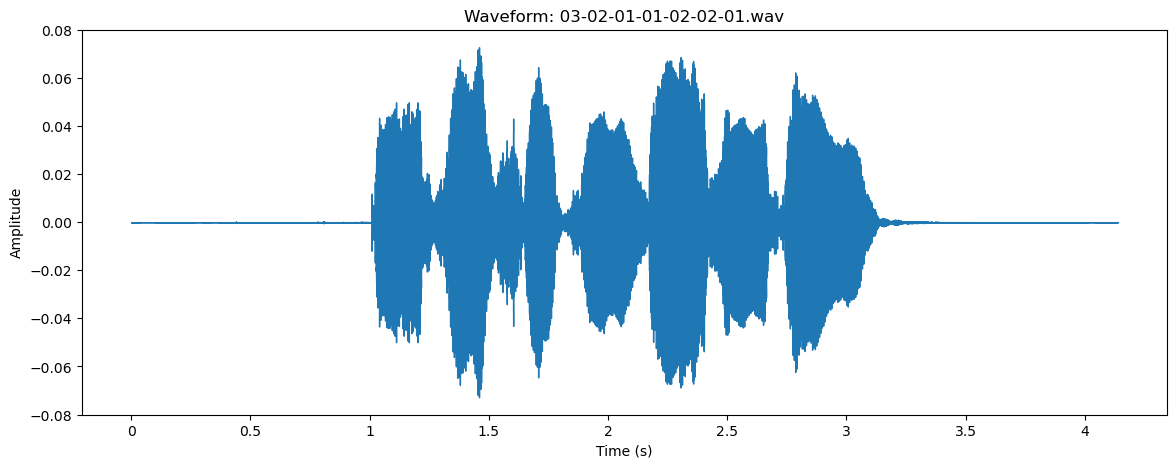

In [153]:

def plot_waveform_and_play(file_path):
    audio_data, sr = librosa.load(file_path)
    
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(audio_data, sr=sr)
    plt.title(f"Waveform: {os.path.basename(file_path)}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()
    
    return ipd.Audio(file_path)

# Example usage
audio_widget = plot_waveform_and_play(file_paths[3])
audio_widget

    


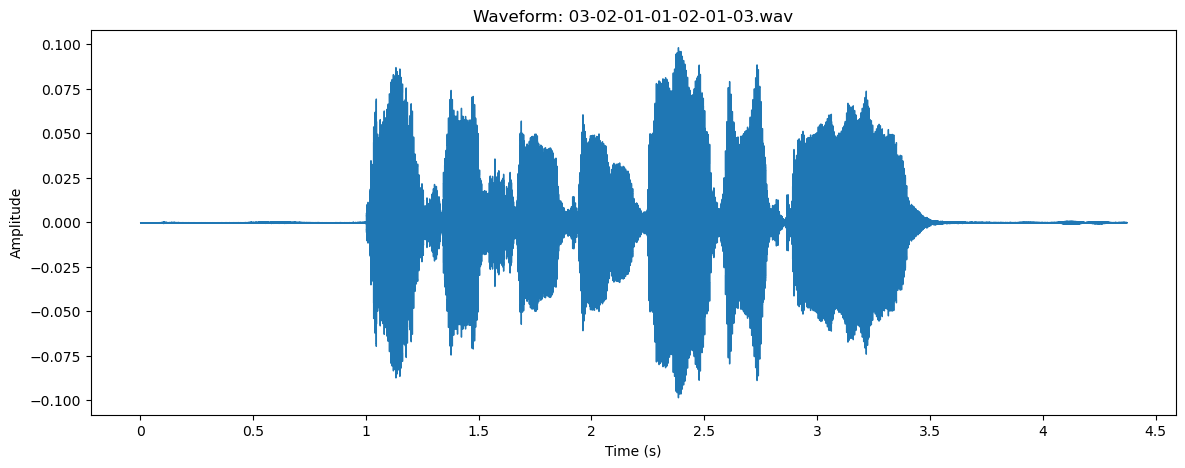

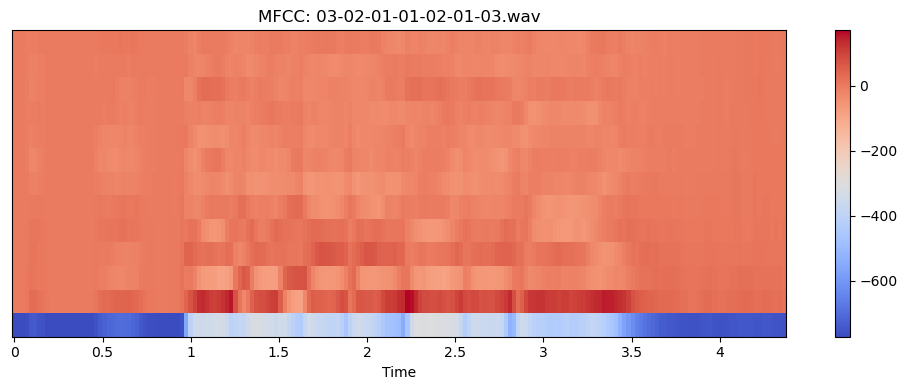

In [154]:
i = 90  
filename = file_paths[i]

data, sample_rate = librosa.load(filename)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(data, sr=sample_rate)
plt.title(f"Waveform: {os.path.basename(filename)}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# MFCC
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')
plt.colorbar()
plt.title(f"MFCC: {os.path.basename(filename)}")
plt.tight_layout()
plt.show()

ipd.Audio(filename)


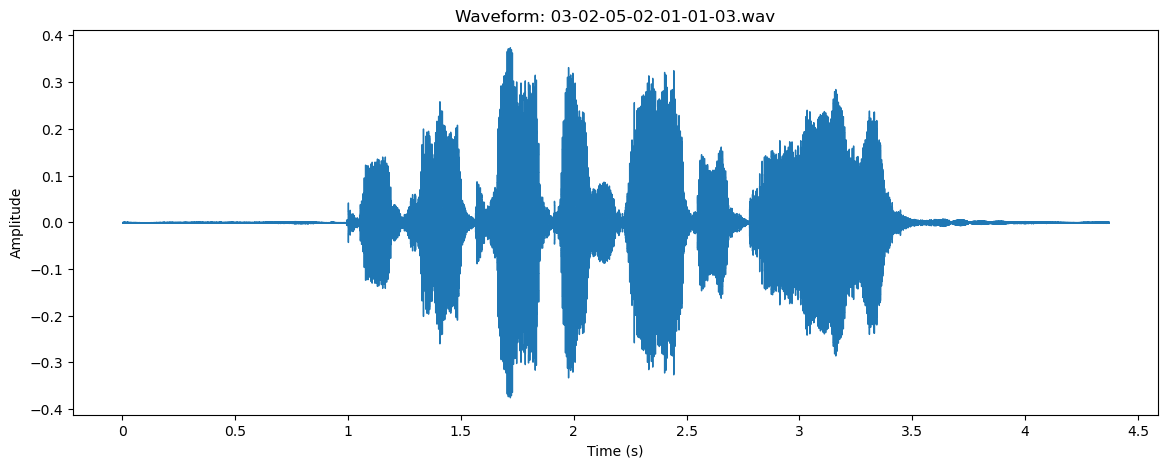

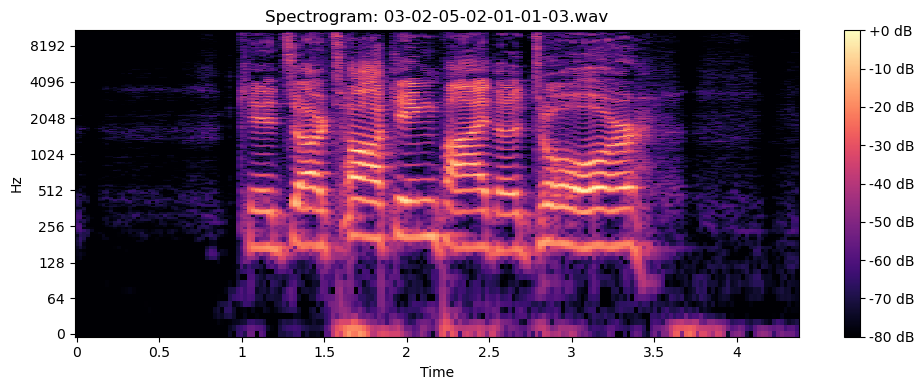

In [155]:
i = 120  
filename = file_paths[i]

data, sample_rate = librosa.load(filename)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(data, sr=sample_rate)
plt.title(f"Waveform: {os.path.basename(filename)}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Spectrogram
stft = np.abs(librosa.stft(data))
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title(f"Spectrogram: {os.path.basename(filename)}")
plt.tight_layout()
plt.show()

ipd.Audio(filename)


In [156]:
i = 3  # Or any valid index
file_path = file_paths[i]

data, sample_rate = librosa.load(file_path)

# Print the raw audio array
print(f"📂 File: {file_path}")
print(f"🎵 Sample rate: {sample_rate}")
print(f"🔹 Audio data shape: {data.shape}")
print(f"🔹 First 10 samples: {data[:10]}")


📂 File: C:\Users\abhis\Downloads\Audio_Data\song\Actor_01\03-02-01-01-02-02-01.wav
🎵 Sample rate: 22050
🔹 Audio data shape: (91232,)
🔹 First 10 samples: [-2.8243399e-15  9.2965661e-15  9.1471820e-14  2.9217717e-14
 -2.6282240e-14  8.1729260e-14  1.3107050e-13  4.3663939e-13
 -6.0286943e-13  1.0455428e-12]


In [157]:
sample_rate

22050

In [158]:
import tensorflow as tf
print(tf.__version__)

2.18.0


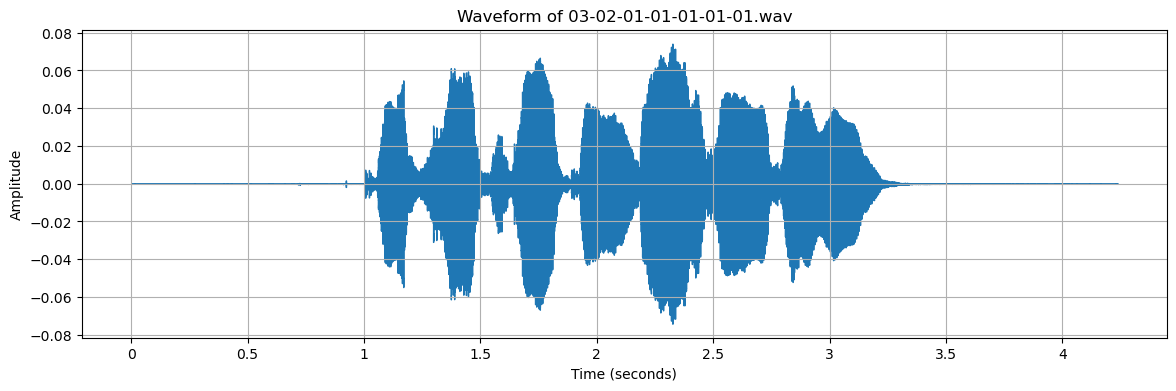

In [159]:

# Choose any valid index
i = 0  
file_path = file_paths[i]  # Make sure file_paths = df['filepath'].tolist()

# Load full audio at original sample rate
y, sr = librosa.load(file_path, sr=None)

# Plot waveform
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform of {os.path.basename(file_path)}")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Play audio
ipd.Audio(file_path)

In [160]:

# Choose index
i = 0  
file_path = file_paths[i]  # Make sure you already have file_paths = df['filepath'].tolist()

# Load audio (full, original sample rate)
y, sr = librosa.load(file_path, sr=None)

# Print stats
print(f"📂 File: {os.path.basename(file_path)}")
print(f"🎵 Sample rate: {sr}")
print("Min amplitude:", np.min(y))
print("Max amplitude:", np.max(y))
print("Mean amplitude:", np.mean(y))
print("🔹 Raw audio data (first 10 samples):")
print(y[:10])



📂 File: 03-02-01-01-01-01-01.wav
🎵 Sample rate: 48000
Min amplitude: -0.06454468
Max amplitude: 0.07418823
Mean amplitude: 7.355582e-06
🔹 Raw audio data (first 10 samples):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [161]:
audio_file_path = file_paths[0]  # Access the first audio file path
print(audio_file_path)


C:\Users\abhis\Downloads\Audio_Data\song\Actor_01\03-02-01-01-01-01-01.wav


In [162]:
from scipy.io import wavfile

# Access first file (or change index as needed)
audio_file_path = file_paths[0]

# Read WAV file
wave_sample_rate, wave_audio = wavfile.read(audio_file_path)

# Print info
print(f"📂 File: {audio_file_path}")
print(f"🎵 Sample rate: {wave_sample_rate}")
print(f"🔹 Audio data type: {wave_audio.dtype}")
print(f"🔹 Audio data shape: {wave_audio.shape}")
print(f"🔹 First 10 samples: {wave_audio[:10]}")


📂 File: C:\Users\abhis\Downloads\Audio_Data\song\Actor_01\03-02-01-01-01-01-01.wav
🎵 Sample rate: 48000
🔹 Audio data type: int16
🔹 Audio data shape: (203404,)
🔹 First 10 samples: [0 0 0 0 0 0 0 0 0 0]


C:\Users\abhis\AppData\Local\Temp\ipykernel_18444\1424344738.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  wave_sample_rate, wave_audio = wavfile.read(audio_file_path)


In [163]:
wave_audio

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

## Extract Features

## here we will be using MeI Frequency Cepstral coefficients (MFCC) from the audios samples.

In [164]:

mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print(f"MFCC shape: {mfccs.shape}")

MFCC shape: (40, 179)


In [165]:
mfccs

array([[-785.1114, -785.1114, -785.1114, ..., -785.1114, -785.1114,
        -785.1114],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       ...,
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ]], dtype=float32)

In [166]:
import librosa
import numpy as np

def extract_features(file_path, max_pad_len=174):
    try:
        audio, sr = librosa.load(file_path, duration=4, offset=0.5)
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
        
        # Pad MFCCs to fixed length
        pad_width = max(0, max_pad_len - mfccs.shape[1])
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        
        # Optionally print shape for debugging
        print(f"MFCC shape after padding: {mfccs.shape}")
        
        # Return mean across time axis
        mfccs_scaled_features = np.mean(mfccs.T, axis=0)
        return mfccs_scaled_features
    
    except Exception as e:
        print(f"Error encountered while parsing file: {file_path}")
        print(e)
        return None


In [167]:
import os
import numpy as np
from tqdm import tqdm

# Your combined dataset path (where you unzipped both speech + song)
audio_dataset_path = r"C:\Users\abhis\Downloads\Audio_Data"

# Label dictionaries
EMOTION_LABELS = {
    "01": "neutral", "02": "calm", "03": "happy", "04": "sad",
    "05": "angry", "06": "fearful", "07": "disgust", "08": "surprised"
}
MODALITY_LABELS = {"01": "full-AV", "02": "video-only", "03": "audio-only"}
VOCAL_CHANNEL_LABELS = {"01": "speech", "02": "song"}
INTENSITY_LABELS = {"01": "normal", "02": "strong"}
STATEMENT_LABELS = {"01": "Kids are talking by the door", "02": "Dogs are sitting by the door"}
REPETITION_LABELS = {"01": "1st repetition", "02": "2nd repetition"}

# Collect features
extracted_features = []

# Traverse both speech + song folders
for main_folder in ["speech", "song"]:
    main_path = os.path.join(audio_dataset_path, main_folder)
    if not os.path.exists(main_path):
        continue

    for actor_folder in os.listdir(main_path):
        actor_path = os.path.join(main_path, actor_folder)
        if not actor_folder.startswith("Actor"):
            continue

        for file in os.listdir(actor_path):
            if file.endswith(".wav"):
                parts = file.split("-")

                if len(parts) < 7:
                    print(f"⚠️ Skipped malformed filename: {file}")
                    continue

                modality_code = parts[0]
                vocal_code = parts[1]
                emotion_code = parts[2]
                intensity_code = parts[3]
                statement_code = parts[4]
                repetition_code = parts[5]
                actor_id = parts[6].split(".")[0]

                modality = MODALITY_LABELS.get(modality_code, "unknown")
                vocal_channel = VOCAL_CHANNEL_LABELS.get(vocal_code, "unknown")
                emotion = EMOTION_LABELS.get(emotion_code, "unknown")
                intensity = INTENSITY_LABELS.get(intensity_code, "unknown")
                statement = STATEMENT_LABELS.get(statement_code, "unknown")
                repetition = REPETITION_LABELS.get(repetition_code, "unknown")
                gender = "male" if int(actor_id) % 2 != 0 else "female"

                file_path = os.path.join(actor_path, file)

                mfccs = extract_features(file_path)  # Assuming you have this function defined

                if mfccs is not None and emotion != "unknown":
                    extracted_features.append([
                        mfccs, modality, vocal_channel, emotion, intensity,
                        statement, repetition, gender, actor_id
                    ])

print(f"✅ Total samples collected: {len(extracted_features)}")


MFCC shape after padding: (40, 174)
MFCC shape after padding: (40, 174)
MFCC shape after padding: (40, 174)
MFCC shape after padding: (40, 174)
MFCC shape after padding: (40, 174)
MFCC shape after padding: (40, 174)
MFCC shape after padding: (40, 174)
MFCC shape after padding: (40, 174)
MFCC shape after padding: (40, 174)
MFCC shape after padding: (40, 174)
MFCC shape after padding: (40, 174)
MFCC shape after padding: (40, 174)
MFCC shape after padding: (40, 174)
MFCC shape after padding: (40, 174)
MFCC shape after padding: (40, 174)
MFCC shape after padding: (40, 174)
MFCC shape after padding: (40, 174)
MFCC shape after padding: (40, 174)
MFCC shape after padding: (40, 174)
MFCC shape after padding: (40, 174)
MFCC shape after padding: (40, 174)
MFCC shape after padding: (40, 174)
MFCC shape after padding: (40, 174)
MFCC shape after padding: (40, 174)
MFCC shape after padding: (40, 174)
MFCC shape after padding: (40, 174)
MFCC shape after padding: (40, 174)
MFCC shape after padding: (4

In [168]:
import pandas as pd

# Convert list of lists to DataFrame
extracted_features_df = pd.DataFrame(
    extracted_features,
    columns=[
        'features', 'modality', 'vocal_channel', 'emotion',
        'intensity', 'statement', 'repetition', 'gender', 'actor_id'
    ]
)

# Show first few rows
print(f"✅ DataFrame created with {len(extracted_features_df)} rows")
extracted_features_df.head()


✅ DataFrame created with 2452 rows


,features,modality,vocal_channel,emotion,intensity,statement,repetition,gender,actor_id
0,"[-466.05542, 45.245552, 0.6181808, 10.233524, ...",audio-only,speech,neutral,normal,Kids are talking by the door,1st repetition,male,01
1,"[-466.71463, 44.7648, -1.8594613, 12.712372, 6...",audio-only,speech,neutral,normal,Kids are talking by the door,2nd repetition,male,01
2,"[-456.52722, 45.969566, -0.6428675, 10.275201,...",audio-only,speech,neutral,normal,Dogs are sitting by the door,1st repetition,male,01
3,"[-434.7016, 42.98303, 2.081019, 10.354303, 5.0...",audio-only,speech,neutral,normal,Dogs are sitting by the door,2nd repetition,male,01
4,"[-524.12976, 54.19037, 2.3195047, 12.784919, 6...",audio-only,speech,calm,normal,Kids are talking by the door,1st repetition,male,01


In [169]:
import numpy as np

# Convert 'features' column (which contains MFCC arrays) to numpy array
X_mfcc = np.array(extracted_features_df['features'].tolist())

# Target labels (emotion)
y = extracted_features_df['emotion']

print(f"✅ X_mfcc shape: {X_mfcc.shape}")
print(f"✅ y shape: {y.shape}")
print(f"✅ Example classes: {y.unique()}")


✅ X_mfcc shape: (2452, 40)
✅ y shape: (2452,)
✅ Example classes: ['neutral' 'calm' 'happy' 'sad' 'angry' 'fearful' 'disgust' 'surprised']


In [170]:
X.shape

(2452, 40)

In [171]:
## label encoding
y=np.array(pd.get_dummies(y))

In [172]:
y.shape

(2452, 8)

In [173]:
## Train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)



In [174]:
X_train.shape

(1961, 40)

In [175]:
X_test.shape

(491, 40)

In [176]:
X_train

array([[-4.7119162e+02,  5.1580761e+01,  3.1055768e+00, ...,
        -5.0508976e-01, -2.1208744e+00, -5.2076721e-01],
       [-3.8594073e+02,  6.1182133e+01, -2.4085983e+01, ...,
         1.2306849e+01,  1.6848543e+01,  1.7765463e+01],
       [-5.4092224e+02,  4.8387299e+01, -2.0166544e+01, ...,
        -1.9989918e+00, -1.7769002e+00,  1.0502557e+01],
       ...,
       [-3.5536478e+02,  2.9266041e+01, -2.2782999e+01, ...,
         1.7533596e+00,  3.3722666e-01,  1.4574988e+00],
       [-5.3775647e+02,  5.8790730e+01, -1.5118563e+01, ...,
         1.5659901e+01,  1.5733705e+01,  1.8480881e+01],
       [-4.3017969e+02,  5.1470165e+01,  4.6668677e+00, ...,
         1.0715370e+00,  9.2199612e-01,  1.8074923e+00]], dtype=float32)

In [177]:
y

array([[False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [178]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [179]:
## no of classes
num_labels=y.shape[1]

In [180]:
import os
import numpy as np
import librosa
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Dropout, Bidirectional, LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

def extract_features(file_path, max_pad_len=174):
    try:
        audio, sr = librosa.load(file_path, duration=4, offset=0.5)
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
        pad_width = max(0, max_pad_len - mfccs.shape[1])
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        mfccs = (mfccs - np.mean(mfccs)) / (np.std(mfccs) + 1e-6)
        return mfccs.T  # Shape: (time_steps, features)
    except Exception as e:
        print(f"❌ Error processing {file_path}: {e}")
        return None

def load_combined_data(base_path):
    EMOTION_LABELS = {
        "01": "neutral", "02": "calm", "03": "happy", "04": "sad",
        "05": "angry", "06": "fearful", "07": "disgust", "08": "surprised"
    }
    features, labels = [], []
    for main_folder in ["speech", "song"]:
        folder_path = os.path.join(base_path, main_folder)
        if not os.path.exists(folder_path):
            continue
        for actor_folder in os.listdir(folder_path):
            actor_path = os.path.join(folder_path, actor_folder)
            if not actor_folder.startswith("Actor"):
                continue
            for file in os.listdir(actor_path):
                if file.endswith(".wav"):
                    parts = file.split("-")
                    if len(parts) < 7:
                        continue
                    label = EMOTION_LABELS.get(parts[2])
                    f = extract_features(os.path.join(actor_path, file))
                    if f is not None and label is not None:
                        features.append(f)
                        labels.append(label)
    return np.array(features), np.array(labels)

# Load and prepare data
X, y = load_combined_data(r"C:\Users\abhis\Downloads\Audio_Data")
print("✅ Loaded X shape:", X.shape)

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)
num_classes = y_cat.shape[1]
print(f"✅ Number of classes: {num_classes}")

X_train, X_val, y_train, y_val = train_test_split(X, y_cat, test_size=0.2, stratify=y_cat, random_state=42)

# Build CNN1D + LSTM model
model = Sequential([
    Conv1D(64, kernel_size=5, activation='relu', input_shape=X_train.shape[1:]),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.3),

    Conv1D(128, kernel_size=5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.3),

    Bidirectional(LSTM(64)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Callbacks
checkpoint = ModelCheckpoint("emotion_cnn1d_lstm_best.keras", monitor='val_accuracy', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=40,
    batch_size=32,
    callbacks=[checkpoint, reduce_lr]
)

model.save("emotion_cnn1d_lstm_final.keras")
print("✅ CNN1D+LSTM model saved.")


✅ Loaded X shape: (2452, 174, 40)
✅ Number of classes: 8


C:\Users\abhis\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)               │ (None, 170, 64)        │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 170, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 85, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 85, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 81, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 81, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 40, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 40, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,080 (668.28 KB)

 Trainable params: 170,696 (666.78 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/40
61/62 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2249 - loss: 1.9439
Epoch 1: val_accuracy improved from -inf to 0.24644, saving model to emotion_cnn1d_lstm_best.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.2260 - loss: 1.9404 - val_accuracy: 0.2464 - val_loss: 1.9248 - learning_rate: 0.0010
Epoch 2/40
61/62 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3861 - loss: 1.5846
Epoch 2: val_accuracy did not improve from 0.24644
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.3857 - loss: 1.5843 - val_accuracy: 0.1589 - val_loss: 2.2795 - learning_rate: 0.0010
Epoch 3/40
61/62 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4504 - loss: 1.4352
Epoch 3: val_accuracy did not improve from 0.24644
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.4505 - loss: 1.4350 - val_accuracy: 0.1874 - val_loss: 2.3722 - learning_rate: 0.0010
Epoch 4/40
61/62 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5294 - loss: 1.2693
Epoch 4: val_accuracy improved from 0.

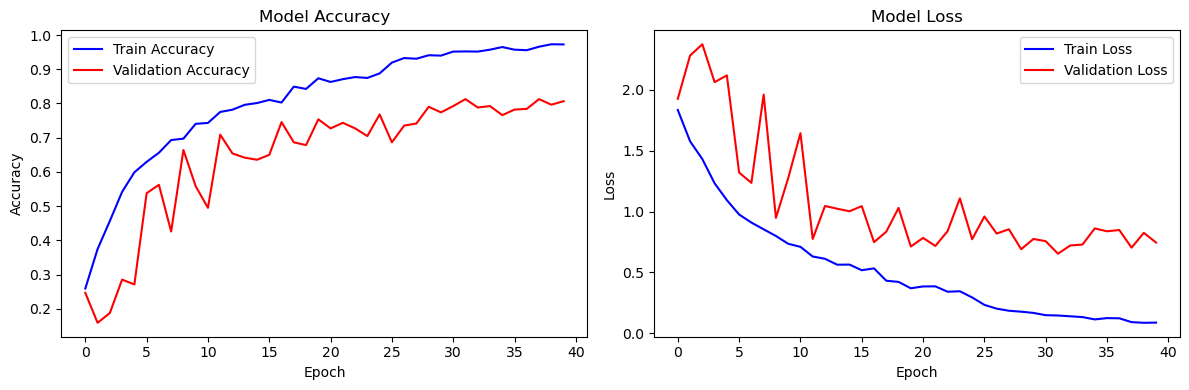

In [181]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'b-', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], 'r-', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'b-', label='Train Loss')
plt.plot(history.history['val_loss'], 'r-', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [182]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)               │ (None, 170, 64)        │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 170, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 85, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 85, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 81, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 81, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 40, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 40, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 512,474 (1.95 MB)

 Trainable params: 170,696 (666.78 KB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 341,394 (1.30 MB)

In [183]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [184]:
best_val_acc = max(history.history['val_accuracy'])
print(f"🌟 Best validation accuracy: {best_val_acc:.4f}")


🌟 Best validation accuracy: 0.8126


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step

Classification Report:
              precision    recall  f1-score   support

       angry       0.95      0.79      0.86        75
        calm       0.81      0.89      0.85        75
     disgust       0.88      0.77      0.82        39
     fearful       0.85      0.76      0.80        75
       happy       0.87      0.79      0.83        75
     neutral       0.62      0.89      0.73        38
         sad       0.71      0.73      0.72        75
   surprised       0.78      0.90      0.83        39

    accuracy                           0.81       491
   macro avg       0.81      0.82      0.81       491
weighted avg       0.82      0.81      0.81       491

Overall Accuracy: 0.8065
Macro F1 Score: 0.8059


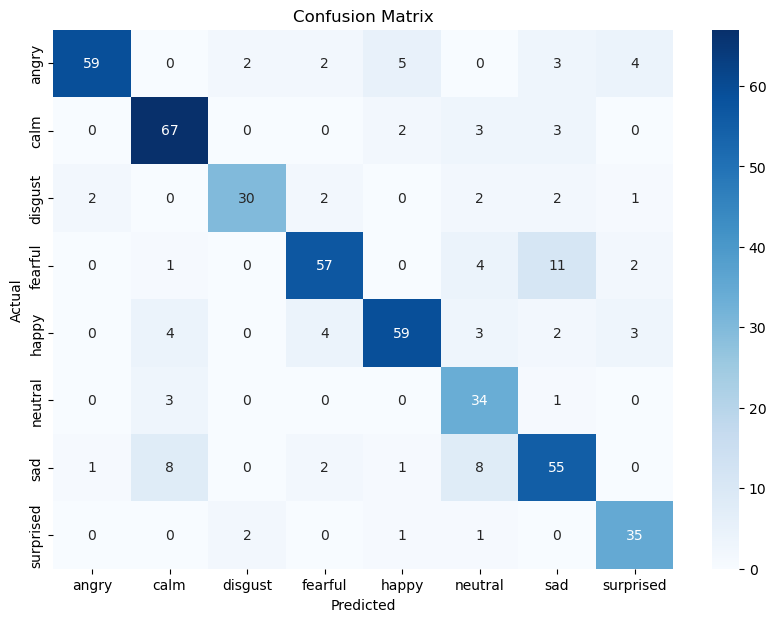


Per Class Accuracy (%):
angry: 78.67%
calm: 89.33%
disgust: 76.92%
fearful: 76.00%
happy: 78.67%
neutral: 89.47%
sad: 73.33%
surprised: 89.74%


In [185]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluate_model(model, X_data, y_data, class_names):
    # Predict
    y_pred = model.predict(X_data)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_data, axis=1)

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_true_labels, y_pred_labels, target_names=class_names))

    # Overall accuracy
    acc = accuracy_score(y_true_labels, y_pred_labels)
    print(f"Overall Accuracy: {acc:.4f}")

    # F1 score (macro avg)
    f1 = f1_score(y_true_labels, y_pred_labels, average='macro')
    print(f"Macro F1 Score: {f1:.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    # Per class accuracy
    cm_diag = cm.diagonal()
    cm_class_count = cm.sum(axis=1)
    per_class_acc = cm_diag / cm_class_count

    print("\nPer Class Accuracy (%):")
    for i, class_name in enumerate(class_names):
        print(f"{class_name}: {per_class_acc[i]*100:.2f}%")

# Example usage
# Make sure you have y_val (one-hot), X_val, model, and le (LabelEncoder fitted on y)
class_names = le.classes_
evaluate_model(model, X_val, y_val, class_names)
